In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Set the file IDs of the CSV files you want to download
# strength_star_partial.csv: https://drive.google.com/file/d/11_oKRQgTlcm_JB-sAfjDxlLqcNuDt-Vq/view?usp=drive_link
# eigenvector_partial.csv: https://drive.google.com/file/d/1FKryXFnX8Hgg8MwYMsII20U_iif0QMyP/view?usp=drive_link
# clustering_pearson.csv: https://drive.google.com/file/d/1voPNJCjniTLvAUk5_hpuLLIkLz_Lnb1N/view?usp=drive_link
# betweenness_partial.csv: https://drive.google.com/file/d/1Hh-uFvW_wTDMPZlWR57WpkQIKL2JVFtY/view?usp=drive_link

file_ids = {"strength_star_partial.csv":'11_oKRQgTlcm_JB-sAfjDxlLqcNuDt-Vq',
            "eigenvector_partial.csv":'1FKryXFnX8Hgg8MwYMsII20U_iif0QMyP',
            "clustering_pearson.csv":'1voPNJCjniTLvAUk5_hpuLLIkLz_Lnb1N',
            "betweenness_partial.csv":'1Hh-uFvW_wTDMPZlWR57WpkQIKL2JVFtY'}

# Iterate through file IDs and download the files
for file_name in file_ids:
  downloaded = drive.CreateFile({'id': file_ids[file_name]})
  downloaded.GetContentFile(file_name)
  print(f"{file_name} downloaded successfully")


strength_star_partial.csv downloaded successfully
eigenvector_partial.csv downloaded successfully
clustering_pearson.csv downloaded successfully
betweenness_partial.csv downloaded successfully


In [ ]:
import pandas as pd
import numpy as np

"""
create merged data
"""
# create dataframes
strength_star_partial = pd.read_csv("strength_star_partial.csv", header=2, nrows=108)
eigenvector_partial = pd.read_csv("eigenvector_partial.csv", header=2,nrows=108)
clustering_pearson = pd.read_csv("clustering_pearson.csv", header=2,nrows=108)
betweenness_partial = pd.read_csv("betweenness_partial.csv", header=2,nrows=108)

# Store the 'ID' column in a separate variable
strength_star_partial_id_column = strength_star_partial['ID/Node']
eigenvector_partial_id_column = eigenvector_partial['ID/Node']
clustering_pearson_id_column = clustering_pearson['ID/Node']
betweenness_partial_id_column = betweenness_partial['ID/Node']

# Drop the 'ID' column temporarily
strength_star_partial.drop(columns='ID/Node', inplace=True)
eigenvector_partial.drop(columns='ID/Node', inplace=True)
clustering_pearson.drop(columns='ID/Node', inplace=True)
betweenness_partial.drop(columns='ID/Node', inplace=True)

# add prefix
strength_star_partial = strength_star_partial.add_prefix("strength_")
eigenvector_partial = eigenvector_partial.add_prefix("eigenvector_")
clustering_pearson = clustering_pearson.add_prefix("clustering_")
betweenness_partial = betweenness_partial.add_prefix("betweenness_")

# Re-add the 'ID' column to the DataFrame
strength_star_partial['ID/Node'] = strength_star_partial_id_column
eigenvector_partial['ID/Node'] = eigenvector_partial_id_column
clustering_pearson['ID/Node'] = clustering_pearson_id_column
betweenness_partial['ID/Node'] = betweenness_partial_id_column

# merge dataframes
merged_df = pd.merge(strength_star_partial, eigenvector_partial, on='ID/Node', how='inner')
merged_df = pd.merge(merged_df, clustering_pearson, on='ID/Node', how='inner')
merged_df = pd.merge(merged_df, betweenness_partial, on='ID/Node', how='inner')

# move ID column to front
id_column = merged_df['ID/Node']
merged_df.drop(columns='ID/Node', inplace=True)
merged_df.insert(0, 'ID/Node', id_column)

In [ ]:
merged_df

,ID/Node,strength_1,strength_2,strength_3,strength_6,strength_7,strength_8,strength_11,strength_12,strength_13,...,betweenness_285,betweenness_286,betweenness_287,betweenness_288,betweenness_289,betweenness_290,betweenness_291,betweenness_292,betweenness_293,betweenness_294
0,002_S_4229_2011-09-21_16_35_10,0.007071,0.006486,0.008653,0.009544,0.007007,0.009739,0.006363,0.008257,0.008537,...,0.00185,0.00381,0.00164,0.00344,0.00568,0.00119,0.002550,0.004540,0.00299,0.00227
1,002_S_4473_2012-02-10_08_17_15,0.008261,0.004981,0.005140,0.005211,0.004336,0.009269,0.009774,0.006826,0.009529,...,0.00194,0.00276,0.00271,0.00269,0.00316,0.00250,0.003580,0.009750,0.00248,0.00108
2,002_S_4521_2012-02-17_16_52_08,0.004719,0.003531,0.006254,0.004122,0.004232,0.002604,0.003663,0.005739,0.005030,...,0.00849,0.00893,0.00503,0.00512,0.00351,0.00360,0.002290,0.010900,0.00266,0.00442
3,002_S_4799_2012-06-21_16_25_41,0.007510,0.008693,0.011294,0.007898,0.003490,0.006399,0.010510,0.010872,0.008915,...,0.00524,0.00404,0.00334,0.00152,0.00299,0.00180,0.000655,0.002660,0.00638,0.00743
4,002_S_6695_2019-03-14_07_51_57,0.006992,0.006583,0.005526,0.006886,0.005253,0.005107,0.010990,0.013211,0.009738,...,0.00423,0.00944,0.00367,0.00245,0.00559,0.00164,0.003020,0.004370,0.00143,0.00468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,301_S_6508_2018-08-07_11_22_09,0.006660,0.006257,0.007698,0.008484,0.007332,0.009462,0.008762,0.009950,0.009952,...,0.00559,0.00556,0.00325,0.00271,0.00276,0.00194,0.007150,0.000865,0.00584,0.00685
104,301_S_6777_2019-08-12_12_05_29,0.006240,0.009777,0.007252,0.008226,0.008463,0.008328,0.008490,0.006542,0.005892,...,0.00110,0.00278,0.00161,0.00299,0.00332,0.00157,0.003620,0.004280,0.00351,0.00376
105,305_S_6378_2019-05-24_12_08_00,0.005774,0.007309,0.006678,0.005262,0.007076,0.008814,0.008590,0.009732,0.011387,...,0.00290,0.00463,0.00306,0.00245,0.00339,0.00126,0.003040,0.007600,0.00430,0.00783
106,305_S_6744_2019-06-29_09_05_20,0.008535,0.007869,0.007340,0.009151,0.006781,0.006272,0.008330,0.009755,0.009372,...,0.00351,0.00236,0.00147,0.00556,0.00318,0.00386,0.003270,0.005240,0.00164,0.00372


In [ ]:
"""
create merged null dataframe (null is what we compare against)
"""
# create dataframes
null_strength_star_partial = pd.read_csv("strength_star_partial.csv", header=113)
null_eigenvector_partial = pd.read_csv("eigenvector_partial.csv", header=113)
null_clustering_pearson = pd.read_csv("clustering_pearson.csv", header=113)
null_betweenness_partial = pd.read_csv("betweenness_partial.csv", header=113)

# Store the 'ID' column in a separate variable
null_strength_star_partial_id_column = null_strength_star_partial['ID/Node']
null_eigenvector_partial_id_column = null_eigenvector_partial['ID/Node']
null_clustering_pearson_id_column = null_clustering_pearson['ID/Node']
null_betweenness_partial_id_column = null_betweenness_partial['ID/Node']

# Drop the 'ID' column temporarily
null_strength_star_partial.drop(columns='ID/Node', inplace=True)
null_eigenvector_partial.drop(columns='ID/Node', inplace=True)
null_clustering_pearson.drop(columns='ID/Node', inplace=True)
null_betweenness_partial.drop(columns='ID/Node', inplace=True)

# add prefix
null_strength_star_partial = null_strength_star_partial.add_prefix("strength_")
null_eigenvector_partial = null_eigenvector_partial.add_prefix("eigenvector_")
null_clustering_pearson = null_clustering_pearson.add_prefix("clustering_")
null_betweenness_partial = null_betweenness_partial.add_prefix("betweenness_")

# Re-add the 'ID' column to the DataFrame
null_strength_star_partial['ID/Node'] = null_strength_star_partial_id_column
null_eigenvector_partial['ID/Node'] = null_eigenvector_partial_id_column
null_clustering_pearson['ID/Node'] = null_clustering_pearson_id_column
null_betweenness_partial['ID/Node'] = null_betweenness_partial_id_column

# merge dataframes
null_merged_df = pd.merge(null_strength_star_partial, null_eigenvector_partial, on='ID/Node', how='inner')
null_merged_df = pd.merge(null_merged_df, null_clustering_pearson, on='ID/Node', how='inner')
null_merged_df = pd.merge(null_merged_df, null_betweenness_partial, on='ID/Node', how='inner')

# move ID column to front
id_column = null_merged_df['ID/Node']
null_merged_df.drop(columns='ID/Node', inplace=True)
null_merged_df.insert(0, 'ID/Node', id_column)

In [ ]:
merged_df["isNull"] = 0
null_merged_df["isNull"] = 1
concat_df = pd.concat([merged_df,null_merged_df])

In [ ]:
concat_df

,ID/Node,strength_1,strength_2,strength_3,strength_6,strength_7,strength_8,strength_11,strength_12,strength_13,...,betweenness_286,betweenness_287,betweenness_288,betweenness_289,betweenness_290,betweenness_291,betweenness_292,betweenness_293,betweenness_294,isNull
0,002_S_4229_2011-09-21_16_35_10,0.007071,0.006486,0.008653,0.009544,0.007007,0.009739,0.006363,0.008257,0.008537,...,0.003810,0.00164,0.00344,0.005680,0.001190,0.002550,0.00454,0.002990,0.00227,0
1,002_S_4473_2012-02-10_08_17_15,0.008261,0.004981,0.005140,0.005211,0.004336,0.009269,0.009774,0.006826,0.009529,...,0.002760,0.00271,0.00269,0.003160,0.002500,0.003580,0.00975,0.002480,0.00108,0
2,002_S_4521_2012-02-17_16_52_08,0.004719,0.003531,0.006254,0.004122,0.004232,0.002604,0.003663,0.005739,0.005030,...,0.008930,0.00503,0.00512,0.003510,0.003600,0.002290,0.01090,0.002660,0.00442,0
3,002_S_4799_2012-06-21_16_25_41,0.007510,0.008693,0.011294,0.007898,0.003490,0.006399,0.010510,0.010872,0.008915,...,0.004040,0.00334,0.00152,0.002990,0.001800,0.000655,0.00266,0.006380,0.00743,0
4,002_S_6695_2019-03-14_07_51_57,0.006992,0.006583,0.005526,0.006886,0.005253,0.005107,0.010990,0.013211,0.009738,...,0.009440,0.00367,0.00245,0.005590,0.001640,0.003020,0.00437,0.001430,0.00468,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,301_S_6508_2018-08-07_11_22_09,0.006651,0.006092,0.008064,0.008672,0.007267,0.009466,0.008731,0.009914,0.009987,...,0.003110,0.00374,0.00451,0.000725,0.000514,0.002030,0.00145,0.000584,0.00496,1
104,301_S_6777_2019-08-12_12_05_29,0.006205,0.009854,0.006809,0.008237,0.008827,0.008452,0.008360,0.006853,0.005798,...,0.003160,0.00108,0.00411,0.005380,0.000701,0.000982,0.00570,0.003460,0.00234,1
105,305_S_6378_2019-05-24_12_08_00,0.005542,0.006932,0.006756,0.004983,0.006842,0.008771,0.008446,0.009983,0.011618,...,0.000818,0.00274,0.00771,0.001850,0.000397,0.003060,0.00837,0.009190,0.00351,1
106,305_S_6744_2019-06-29_09_05_20,0.008451,0.007751,0.007461,0.009277,0.006730,0.006203,0.008658,0.009517,0.009580,...,0.001990,0.00210,0.00313,0.001960,0.000608,0.005470,0.01410,0.003830,0.00285,1


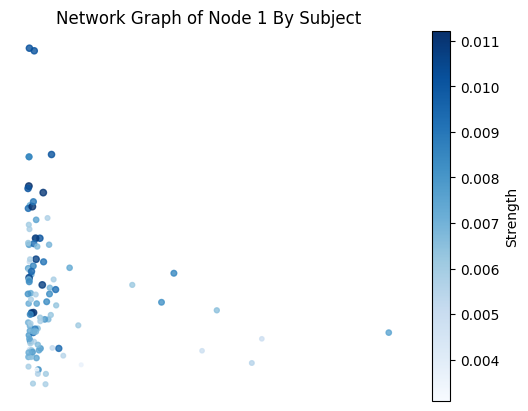

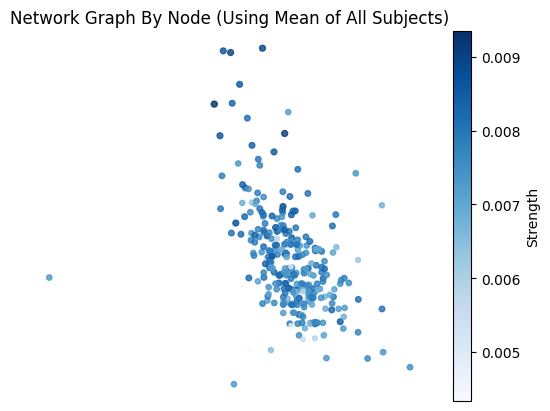

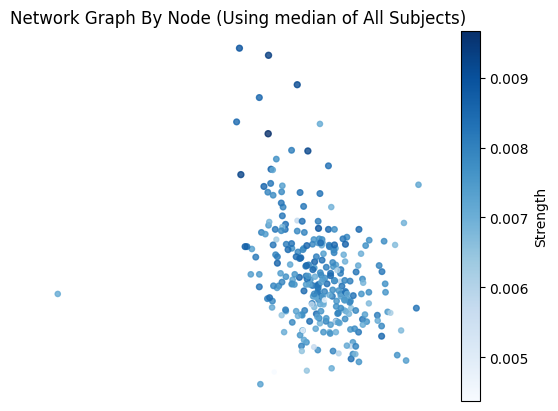

In [ ]:
"""
By Subject for node 1 (not sure if this makes sense)
"""

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
%matplotlib inline

fig, ax = subplots()

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for index, row in merged_df.iterrows():
    node = row['ID/Node']
    attributes = row[["strength_1", "eigenvector_1", "betweenness_1"]]
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_1"] * k, attributes["betweenness_1"] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_1"] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_1"] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_1"] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_1"] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Network Graph of Node 1 By Subject")
ax.set_xlabel("eigenvector centrality mean for all subjects")
ax.set_ylabel("betweenness centrality mean for all subjects")
plt.show()
print()

"""
By mean of all subjects for each node
"""

fig, ax = subplots()

valid_nodes = []
for col in merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":merged_df[f"strength_{i}"].mean(),
                  f"betweenness_{i}":merged_df[f"betweenness_{i}"].mean(),
                  f"eigenvector_{i}":merged_df[f"eigenvector_{i}"].mean()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Network Graph By Node (Using Mean of All Subjects)")
ax.set_xlabel("eigenvector centrality mean for all subjects")
ax.set_ylabel("betweenness centrality mean for all subjects")
plt.show()
print()
"""
By median of all subjects for each node
"""


fig, ax = subplots()

valid_nodes = []
for col in merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":merged_df[f"strength_{i}"].median(),
                  f"betweenness_{i}":merged_df[f"betweenness_{i}"].median(),
                  f"eigenvector_{i}":merged_df[f"eigenvector_{i}"].median()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Network Graph By Node (Using median of All Subjects)")
ax.set_xlabel("eigenvector centrality median for all subjects")
ax.set_ylabel("betweenness centrality median for all subjects")
plt.show()
print()


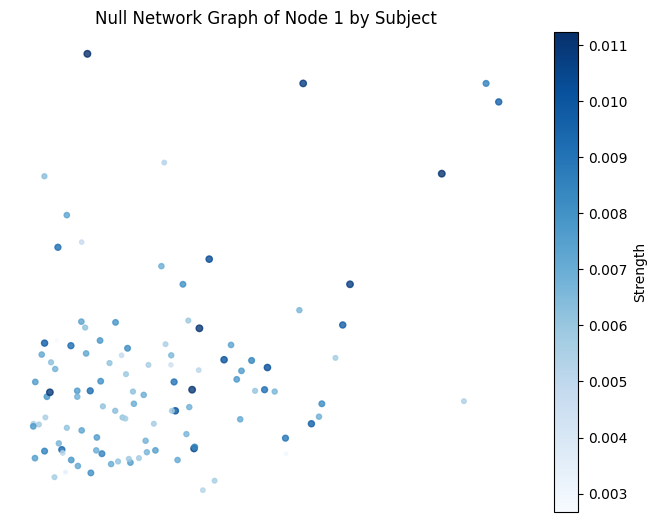

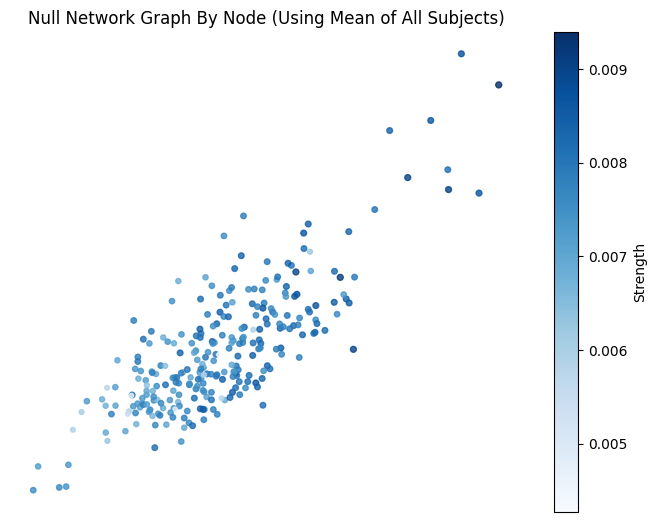

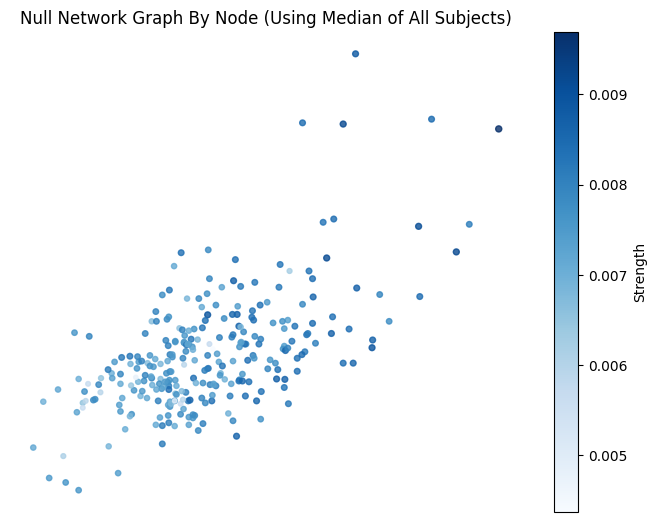

In [ ]:
"""
By Subject (not sure if this makes sense)
"""

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for index, row in null_merged_df.iterrows():
    node = row['ID/Node']
    attributes = row[["strength_1", "eigenvector_1", "betweenness_1"]]
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_1"] * k, attributes["betweenness_1"] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_1"] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_1"] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_1"] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_1"] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph of Node 1 by Subject")
plt.show()
print()

"""
By mean of all subjects for each node
"""

valid_nodes = []
for col in null_merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":null_merged_df[f"strength_{i}"].mean(),
                  f"betweenness_{i}":null_merged_df[f"betweenness_{i}"].mean(),
                  f"eigenvector_{i}":null_merged_df[f"eigenvector_{i}"].mean()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Mean of All Subjects)")
plt.show()
print()
"""
By median of all subjects for each node
"""

valid_nodes = []
for col in null_merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":null_merged_df[f"strength_{i}"].median(),
                  f"betweenness_{i}":null_merged_df[f"betweenness_{i}"].median(),
                  f"eigenvector_{i}":null_merged_df[f"eigenvector_{i}"].median()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Median of All Subjects)")
plt.show()
print()

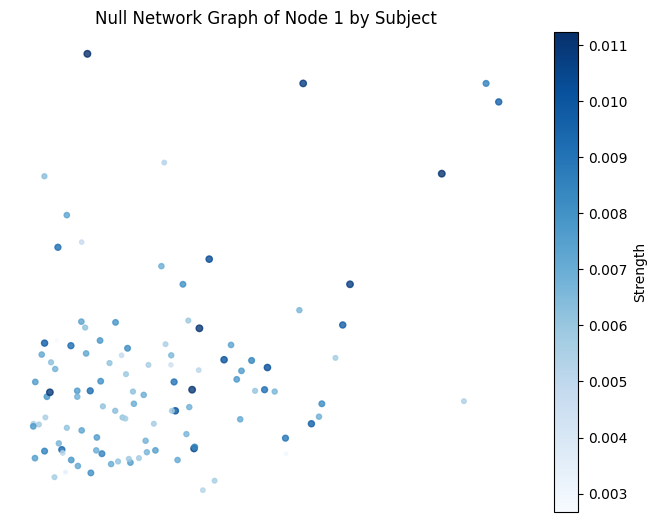

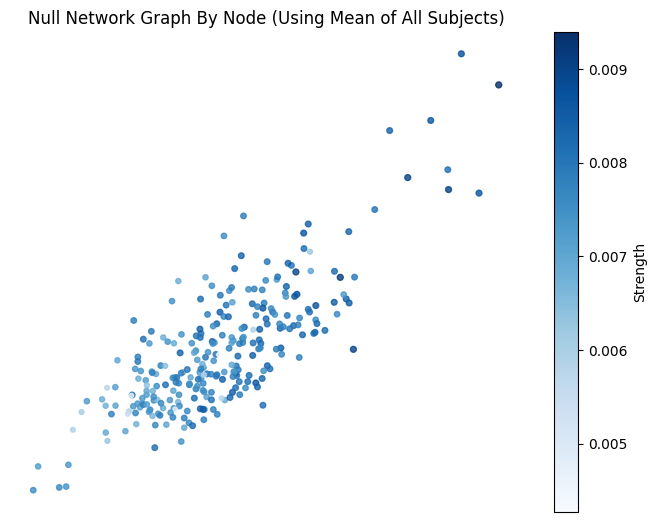

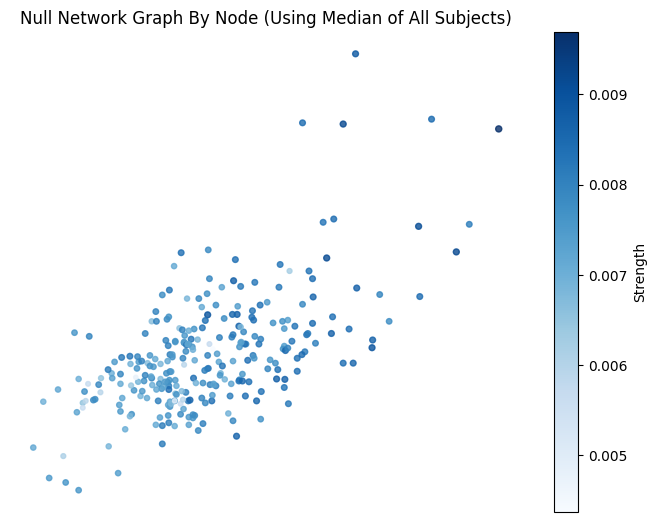

In [ ]:
"""
By Subject (not sure if this makes sense)
"""

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for index, row in null_merged_df.iterrows():
    node = row['ID/Node']
    attributes = row[["strength_1", "eigenvector_1", "betweenness_1"]]
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_1"] * k, attributes["betweenness_1"] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_1"] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_1"] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_1"] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_1"] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph of Node 1 by Subject")
plt.show()
print()

"""
By mean of all subjects for each node
"""

valid_nodes = []
for col in null_merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":null_merged_df[f"strength_{i}"].mean(),
                  f"betweenness_{i}":null_merged_df[f"betweenness_{i}"].mean(),
                  f"eigenvector_{i}":null_merged_df[f"eigenvector_{i}"].mean()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Mean of All Subjects)")
plt.show()
print()
"""
By median of all subjects for each node
"""

valid_nodes = []
for col in null_merged_df.columns:
  if "strength" in col:
    valid_nodes.append(int(col.replace("strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"strength_{i}":null_merged_df[f"strength_{i}"].median(),
                  f"betweenness_{i}":null_merged_df[f"betweenness_{i}"].median(),
                  f"eigenvector_{i}":null_merged_df[f"eigenvector_{i}"].median()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["eigenvector_"+node] * k, attributes["betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["strength_"+node] * 2000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Median of All Subjects)")
plt.show()
print()

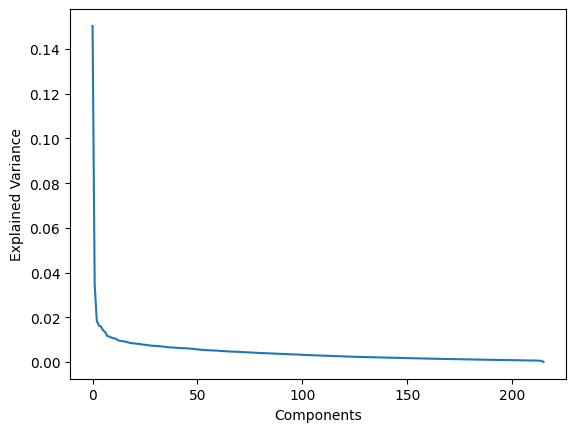

,Principal component 0,Principal component 1,ID/Node,isNull
0,12.955806,-1.890153,002_S_4229_2011-09-21_16_35_10,0
1,5.544206,1.409674,002_S_4473_2012-02-10_08_17_15,0
2,3.329601,20.678714,002_S_4521_2012-02-17_16_52_08,0
3,11.185227,-2.416007,002_S_4799_2012-06-21_16_25_41,0
4,4.817716,3.320186,002_S_6695_2019-03-14_07_51_57,0
...,...,...,...,...
211,-1.620839,-6.669096,301_S_6508_2018-08-07_11_22_09,1
212,-11.563878,3.048531,301_S_6777_2019-08-12_12_05_29,1
213,-8.453726,-6.865152,305_S_6378_2019-05-24_12_08_00,1
214,-4.630328,-4.182800,305_S_6744_2019-06-29_09_05_20,1


In [ ]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot

df = concat_df.drop(columns=["isNull","ID/Node"])

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=216)
test = pca.fit(df_normalized)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

argmax = np.argmax(pca.explained_variance_ratio_* np.arange(pca.explained_variance_ratio_.shape[0]).astype(np.float16))
pca = PCA(n_components=2)
PCA_data = pca.fit_transform(df_normalized)
PCA_data = pd.DataFrame(data=PCA_data,columns=[f"Principal component {i}" for i in range(2)])
PCA_data["ID/Node"] = concat_df["ID/Node"].values
PCA_data["isNull"] = concat_df["isNull"].values
PCA_data

In [ ]:
"""
create merged null dataframe (null is what we compare against)
"""

# Store the 'ID' column in a separate variable
null_merged_id_column = null_merged_df['ID/Node']

# Drop the 'ID' column temporarily
null_merged_df.drop(columns='ID/Node', inplace=True)

# add prefix
null_merged_df = null_merged_df.add_prefix("null_")

# Re-add the 'ID' column to the DataFrame
null_merged_df['ID/Node'] = null_merged_id_column

# merge dataframes
null_and_positive_merged_df = pd.merge(null_merged_df, merged_df, on='ID/Node', how='inner')

# move ID column to front
id_column = null_and_positive_merged_df['ID/Node']
null_and_positive_merged_df.drop(columns='ID/Node', inplace=True)
null_and_positive_merged_df.insert(0, 'ID/Node', id_column)

In [ ]:
null_and_positive_merged_df

,ID/Node,null_strength_1,null_strength_2,null_strength_3,null_strength_6,null_strength_7,null_strength_8,null_strength_11,null_strength_12,null_strength_13,...,betweenness_286,betweenness_287,betweenness_288,betweenness_289,betweenness_290,betweenness_291,betweenness_292,betweenness_293,betweenness_294,isNull
0,002_S_4229_2011-09-21_16_35_10,0.006773,0.006372,0.008808,0.009520,0.007059,0.009732,0.006381,0.008227,0.008908,...,0.00381,0.00164,0.00344,0.00568,0.00119,0.002550,0.004540,0.00299,0.00227,0
1,002_S_4473_2012-02-10_08_17_15,0.008155,0.005153,0.004595,0.004913,0.004597,0.009239,0.009959,0.006802,0.010123,...,0.00276,0.00271,0.00269,0.00316,0.00250,0.003580,0.009750,0.00248,0.00108,0
2,002_S_4521_2012-02-17_16_52_08,0.004827,0.003453,0.006230,0.004069,0.004249,0.002604,0.003806,0.005642,0.004794,...,0.00893,0.00503,0.00512,0.00351,0.00360,0.002290,0.010900,0.00266,0.00442,0
3,002_S_4799_2012-06-21_16_25_41,0.007272,0.008837,0.011476,0.008098,0.003400,0.006070,0.010661,0.010920,0.008808,...,0.00404,0.00334,0.00152,0.00299,0.00180,0.000655,0.002660,0.00638,0.00743,0
4,002_S_6695_2019-03-14_07_51_57,0.007174,0.006480,0.005265,0.007005,0.005069,0.005080,0.010816,0.013310,0.009749,...,0.00944,0.00367,0.00245,0.00559,0.00164,0.003020,0.004370,0.00143,0.00468,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,301_S_6508_2018-08-07_11_22_09,0.006651,0.006092,0.008064,0.008672,0.007267,0.009466,0.008731,0.009914,0.009987,...,0.00556,0.00325,0.00271,0.00276,0.00194,0.007150,0.000865,0.00584,0.00685,0
104,301_S_6777_2019-08-12_12_05_29,0.006205,0.009854,0.006809,0.008237,0.008827,0.008452,0.008360,0.006853,0.005798,...,0.00278,0.00161,0.00299,0.00332,0.00157,0.003620,0.004280,0.00351,0.00376,0
105,305_S_6378_2019-05-24_12_08_00,0.005542,0.006932,0.006756,0.004983,0.006842,0.008771,0.008446,0.009983,0.011618,...,0.00463,0.00306,0.00245,0.00339,0.00126,0.003040,0.007600,0.00430,0.00783,0
106,305_S_6744_2019-06-29_09_05_20,0.008451,0.007751,0.007461,0.009277,0.006730,0.006203,0.008658,0.009517,0.009580,...,0.00236,0.00147,0.00556,0.00318,0.00386,0.003270,0.005240,0.00164,0.00372,0


In [ ]:
valid_nodes = []
for col in null_merged_df.columns:
  if "null_strength" in col:
    valid_nodes.append(int(col.replace("null_strength_","")))

import warnings
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
  for i in valid_nodes:
    null_and_positive_merged_df["difference_strength_"+str(i)] = null_and_positive_merged_df["strength_"+str(i)] - null_and_positive_merged_df["null_strength_"+str(i)]
    null_and_positive_merged_df["difference_eigenvector_"+str(i)] = null_and_positive_merged_df["eigenvector_"+str(i)] - null_and_positive_merged_df["null_eigenvector_"+str(i)]
    null_and_positive_merged_df["difference_betweenness_"+str(i)] = null_and_positive_merged_df["betweenness_"+str(i)] - null_and_positive_merged_df["null_betweenness_"+str(i)]

In [ ]:
list(null_and_positive_merged_df.columns)

['ID/Node',
 'null_strength_1',
 'null_strength_2',
 'null_strength_3',
 'null_strength_6',
 'null_strength_7',
 'null_strength_8',
 'null_strength_11',
 'null_strength_12',
 'null_strength_13',
 'null_strength_14',
 'null_strength_15',
 'null_strength_16',
 'null_strength_17',
 'null_strength_18',
 'null_strength_19',
 'null_strength_20',
 'null_strength_21',
 'null_strength_22',
 'null_strength_23',
 'null_strength_24',
 'null_strength_25',
 'null_strength_26',
 'null_strength_27',
 'null_strength_28',
 'null_strength_29',
 'null_strength_30',
 'null_strength_31',
 'null_strength_32',
 'null_strength_33',
 'null_strength_34',
 'null_strength_35',
 'null_strength_36',
 'null_strength_37',
 'null_strength_38',
 'null_strength_39',
 'null_strength_40',
 'null_strength_41',
 'null_strength_42',
 'null_strength_43',
 'null_strength_44',
 'null_strength_45',
 'null_strength_46',
 'null_strength_47',
 'null_strength_48',
 'null_strength_49',
 'null_strength_50',
 'null_strength_51',
 'null_

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


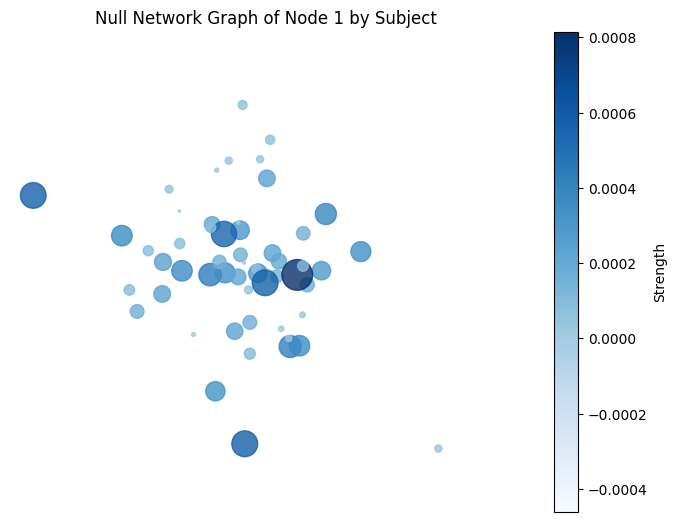

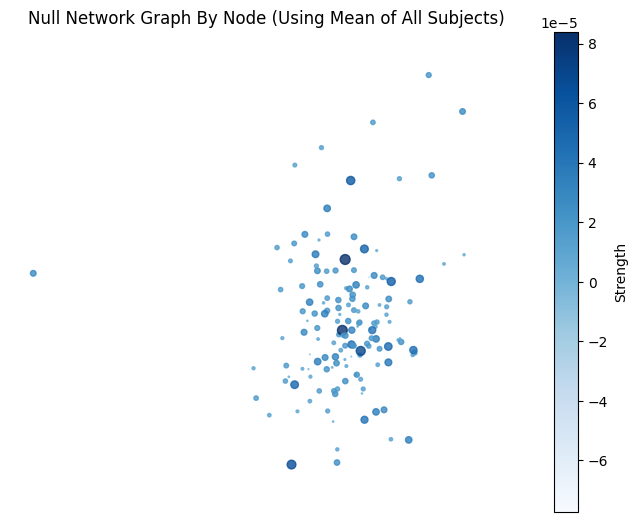

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


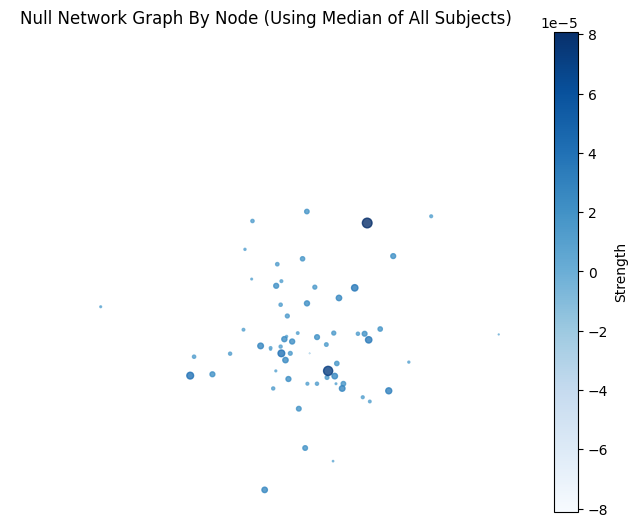

In [ ]:
"""
By Subject (not sure if this makes sense)
"""

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for index, row in null_and_positive_merged_df.iterrows():
    node = row['ID/Node']
    attributes = row[["difference_strength_1", "difference_eigenvector_1", "difference_betweenness_1"]]
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["difference_eigenvector_1"] * k, attributes["difference_betweenness_1"] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["difference_strength_1"] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["difference_strength_1"] * 600000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["difference_strength_1"] for node, attributes in G.nodes(data=True)),vmax=max([attributes["difference_strength_1"] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph of Node 1 by Subject")
plt.show()
print()

"""
By mean of all subjects for each node
"""

valid_nodes = []
for col in null_and_positive_merged_df.columns:
  if "difference_strength" in col:
    valid_nodes.append(int(col.replace("difference_strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"difference_strength_{i}":null_and_positive_merged_df[f"difference_strength_{i}"].mean(),
                  f"difference_betweenness_{i}":null_and_positive_merged_df[f"difference_betweenness_{i}"].mean(),
                  f"difference_eigenvector_{i}":null_and_positive_merged_df[f"eigenvector_{i}"].mean()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["difference_eigenvector_"+node] * k, attributes["difference_betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["difference_strength_"+node] * 600000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Mean of All Subjects)")
plt.show()
print()
"""
By median of all subjects for each node
"""

valid_nodes = []
for col in null_and_positive_merged_df.columns:
  if "difference_strength" in col:
    valid_nodes.append(int(col.replace("difference_strength_","")))

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes from the DataFrame
for i in valid_nodes:
    node = str(i)
    attributes = {f"difference_strength_{i}":null_and_positive_merged_df[f"difference_strength_{i}"].median(),
                  f"difference_betweenness_{i}":null_and_positive_merged_df[f"difference_betweenness_{i}"].median(),
                  f"difference_eigenvector_{i}":null_and_positive_merged_df[f"difference_eigenvector_{i}"].median()}
    G.add_node(node, **attributes)

# Create a layout for the nodes with the specified attributes
# Adjust the scaling factor (k) to control the node positions
k = 10
pos = {node: (attributes["difference_eigenvector_"+node] * k, attributes["difference_betweenness_"+node] * k) for node, attributes in G.nodes(data=True)}

strength_values = [attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)]

nx.draw(G, pos, with_labels=False, node_size=[attributes["difference_strength_"+node] * 600000 for node, attributes in G.nodes(data=True)],
        node_color=strength_values, cmap=plt.cm.Blues, font_size=8, font_color='black', edge_color='gray', alpha=0.8)


# Add a color bar for node sizes
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)),vmax=max([attributes["difference_strength_"+node] for node, attributes in G.nodes(data=True)])))
sm.set_array([])
plt.colorbar(sm, label='Strength', ax=plt.gca())

plt.title("Null Network Graph By Node (Using Median of All Subjects)")
plt.show()
print()

Testing clustering


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Choose the number of clusters
num_clusters = 2

# Perform Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_normalized["ID/Node"] = PCA_data["ID/Node"].values
df_normalized["isNull"] = PCA_data["isNull"].values
df_normalized["cluster"] = kmeans.fit_predict(df_normalized.drop(columns=["ID/Node",'isNull']))


df_normalized["cluster"] = (df_normalized["cluster"].values-1)*-1
df_normalized

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,strength_1,strength_2,strength_3,strength_6,strength_7,strength_8,strength_11,strength_12,strength_13,strength_14,...,betweenness_288,betweenness_289,betweenness_290,betweenness_291,betweenness_292,betweenness_293,betweenness_294,ID/Node,isNull,cluster
0,-0.140637,-0.119438,0.311284,1.112513,0.609115,1.039571,-0.588215,-0.354683,0.370521,-0.216295,...,0.139893,1.636285,-0.740754,-0.271205,-0.220502,-0.273154,-0.487926,002_S_4229_2011-09-21_16_35_10,0,0
1,0.523331,-0.836494,-1.459988,-1.124270,-0.726536,0.813059,1.062577,-1.090794,0.900176,0.593927,...,-0.290392,0.034613,0.185115,0.246292,1.051884,-0.488110,-0.859823,002_S_4473_2012-02-10_08_17_15,0,0
2,-1.453004,-1.527164,-0.898135,-1.686485,-0.778460,-2.401089,-1.894976,-1.649905,-1.503024,0.254878,...,1.103733,0.257067,0.962562,-0.401835,1.332737,-0.412244,0.183989,002_S_4521_2012-02-17_16_52_08,0,0
3,0.104389,0.931785,1.642961,0.262746,-1.149262,-0.571256,1.418675,0.990399,0.571920,0.380364,...,-0.961638,-0.073436,-0.309624,-1.223298,-0.679636,1.155673,1.124670,002_S_4799_2012-06-21_16_25_41,0,0
4,-0.184854,-0.073111,-1.265416,-0.259644,-0.267711,-1.194262,1.650730,2.193572,1.011724,0.647337,...,-0.428084,1.579082,-0.422707,-0.035065,-0.262020,-0.930668,0.265244,002_S_6695_2019-03-14_07_51_57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-0.374954,-0.306988,0.014516,0.662479,0.738638,0.908165,0.557494,0.497746,1.145007,-1.620308,...,0.753768,-1.513034,-1.218530,-0.532465,-0.975142,-1.287242,0.352749,301_S_6508_2018-08-07_11_22_09,1,1
104,-0.623588,1.485229,-0.618474,0.438176,1.518673,0.419103,0.377922,-1.076989,-1.092576,-1.626480,...,0.524282,1.445610,-1.086364,-1.059005,0.062793,-0.075057,-0.466049,301_S_6777_2019-08-12_12_05_29,1,1
105,-0.993817,0.093029,-0.644900,-1.242126,0.526245,0.572933,0.419798,0.533043,2.015672,-0.390331,...,2.589653,-0.798002,-1.301222,-0.014968,0.714860,2.340040,-0.100403,305_S_6378_2019-05-24_12_08_00,1,1
106,0.629427,0.483067,-0.289867,0.974654,0.470518,-0.665710,0.522127,0.293196,0.927195,-1.023520,...,-0.037958,-0.728088,-1.152094,1.195873,2.114241,0.080892,-0.306665,305_S_6744_2019-06-29_09_05_20,1,1


In [ ]:
roc_auc_score(df_normalized["isNull"].values, df_normalized["cluster"].values)

0.9398148148148149

For n_clusters = 2 The average silhouette_score is : 0.10377817488353452


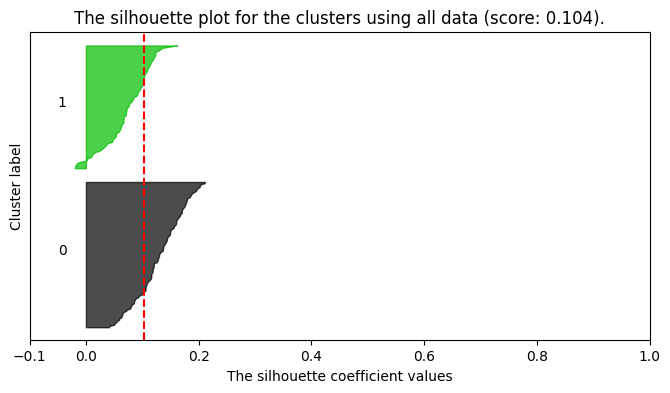

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_normalized.drop(columns=["ID/Node","cluster","isNull"])) + (num_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df_normalized.drop(columns=["ID/Node","cluster","isNull"]), df_normalized["cluster"])
print("For n_clusters =", num_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_normalized.drop(columns=["ID/Node","cluster","isNull"]), df_normalized["cluster"])

y_lower = 10
for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[df_normalized["cluster"] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title(f"The silhouette plot for the clusters using all data (score: {round(silhouette_avg,3)}).")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9398148148148149
For n_clusters = 2 The average silhouette_score is : 0.5431611275095187


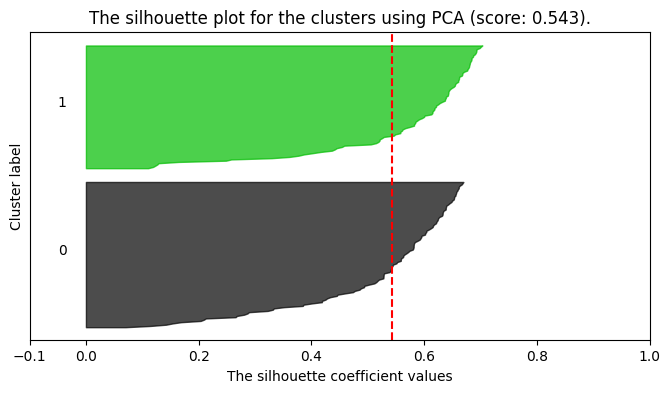

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Choose the number of clusters
num_clusters = 2

# Perform Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
PCA_data["cluster"] = kmeans.fit_predict(PCA_data.drop(columns=["ID/Node",'isNull']))

print(roc_auc_score(PCA_data["isNull"].values, PCA_data["cluster"].values))
#PCA_data["cluster"] = PCA_data["cluster"]
PCA_data

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(PCA_data.drop(columns=["ID/Node","cluster","isNull"])) + (num_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(PCA_data.drop(columns=["ID/Node","cluster","isNull"]), PCA_data["cluster"])
print("For n_clusters =", num_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(PCA_data.drop(columns=["ID/Node","cluster","isNull"]), PCA_data["cluster"])

y_lower = 10
for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[PCA_data["cluster"] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title(f"The silhouette plot for the clusters using PCA (score: {round(silhouette_avg,3)}).")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
roc_auc_score(PCA_data["isNull"].values, PCA_data["cluster"].values)

0.9398148148148149

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_normalized, test_size=0.2)

clf = svm.SVC()
clf.fit(train.drop(columns=["isNull","ID/Node"]), train["isNull"])

pred = clf.predict(test.drop(columns=["isNull","ID/Node"]))

In [ ]:
roc_auc_score(test["isNull"].values, pred)

0.9791666666666667

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Choose the number of clusters
num_clusters = 3

# Perform Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
PCA_data["cluster"] = kmeans.fit_predict(PCA_data.drop(columns=["isNull","ID/Node"]))


# PCA_data["cluster"] = (PCA_data["cluster"]-1)*-1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


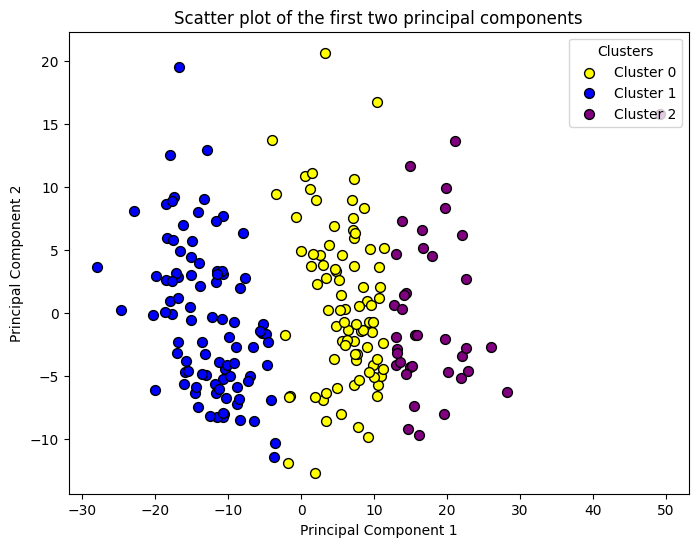

In [ ]:
# Plot the first two principal components
labels = PCA_data["cluster"]
plt.figure(figsize=(8, 6))
# Add legend

colors = ["yellow","blue","purple"]
# Create a scatter plot for each cluster
for cluster_label in np.unique(labels):
    cluster_points = PCA_data[labels == cluster_label]
    plt.scatter(PCA_data[PCA_data["cluster"] == cluster_label]['Principal component 0'], PCA_data[PCA_data["cluster"] == cluster_label]['Principal component 1'], color=colors[cluster_label], label=f'Cluster {cluster_label}', edgecolor='k', s=50)

# Add legend
plt.legend(title='Clusters', loc="upper right")


plt.title('Scatter plot of the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
PCA_data["cluster"].values

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


labels = PCA_data["isNull"].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)

n_components = 3

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)


y_pred = classifier.predict(X_test_pca)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[17  0]
 [ 0 27]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, PCA_data.drop(columns=["ID/Node", "isNull"]), PCA_data["isNull"], cv=5)
scores

array([1.        , 0.97674419, 0.97674419, 0.95348837, 1.        ])

In [ ]:
scores.mean()

0.9813953488372092

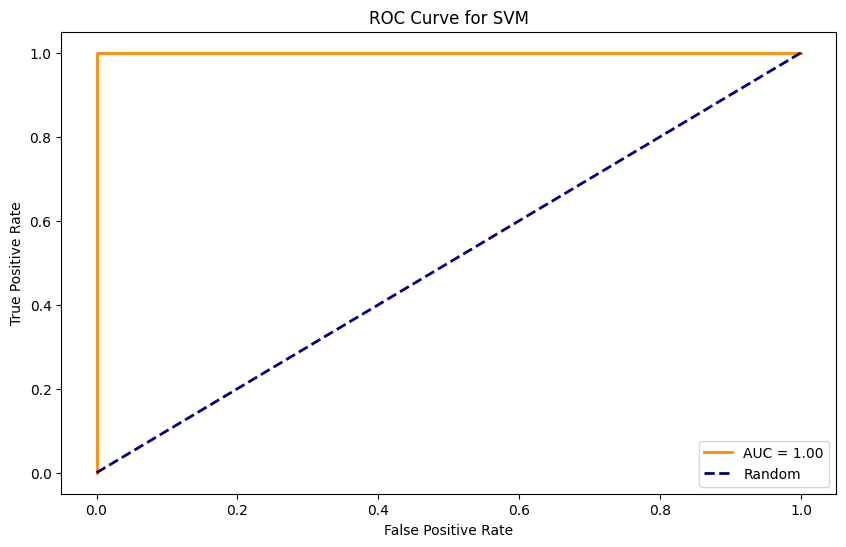

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

labels = PCA_data["isNull"].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)

n_components = 3

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initializing and training SVM
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_pca, y_train)

# Making predictions
y_scores = svm_classifier.predict_proba(X_test_pca)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score


labels = PCA_data["isNull"].values


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)


n_components = 3

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initializing and training SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Making predictions
y_pred = svm_classifier.predict(X_test_pca)

# Calculating metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[17  0]
 [ 0 27]]


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score



# Choose the number of clusters
num_clusters = 2

# Perform Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
PCA_data["cluster"] = kmeans.fit_predict(PCA_data.drop(columns=["ID/Node", 'isNull']))

# Assuming PCA_data contains the ground truth labels
labels_true = PCA_data["isNull"]

# Calculate clustering evaluation metrics
ari = adjusted_rand_score(labels_true, PCA_data["cluster"])
nmi = normalized_mutual_info_score(labels_true, PCA_data["cluster"])
silhouette = silhouette_score(PCA_data.drop(columns=["ID/Node", 'isNull']), PCA_data["cluster"])

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index (ARI): 0.7727
Normalized Mutual Information (NMI): 0.6928
Silhouette Score: 0.5437


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.metrics import roc_auc_score

# Choose the number of clusters
num_clusters = 2

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
PCA_data["agg_cluster"] = agg_cluster.fit_predict(PCA_data.drop(columns=["ID/Node", 'isNull']))

# Assuming PCA_data contains the ground truth labels
labels_true = PCA_data["isNull"]

# Calculate clustering evaluation metrics
ari = adjusted_rand_score(labels_true, PCA_data["agg_cluster"])
nmi = normalized_mutual_info_score(labels_true, PCA_data["agg_cluster"])
silhouette = silhouette_score(PCA_data.drop(columns=["ID/Node", 'isNull']), PCA_data["agg_cluster"])
roc_auc =  roc_auc_score(labels_true, PCA_data["agg_cluster"])

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"ROC Score: {roc_auc:.4f}")

Adjusted Rand Index (ARI): 0.8226
Normalized Mutual Information (NMI): 0.7737
Silhouette Score: 0.5406
ROC Score: 0.9537


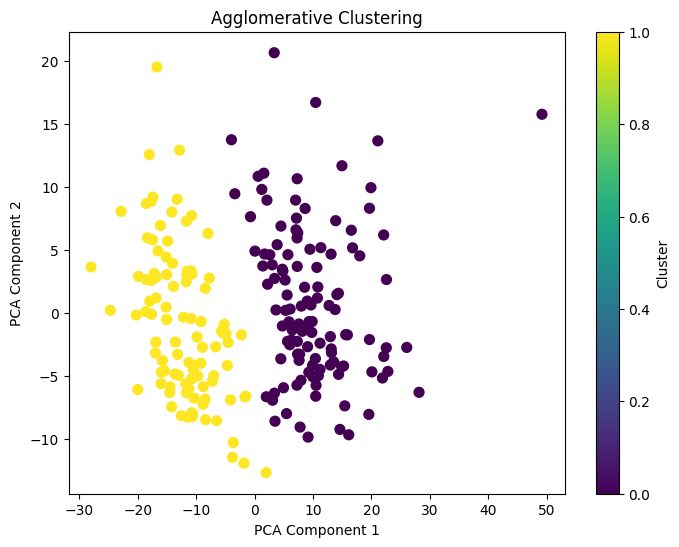

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Perform PCA for visualization purposes
pca = PCA(n_components=2)
PCA_transformed = pca.fit_transform(PCA_data.drop(columns=["ID/Node", 'isNull']))

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(PCA_transformed[:, 0], PCA_transformed[:, 1], c=PCA_data["agg_cluster"], cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



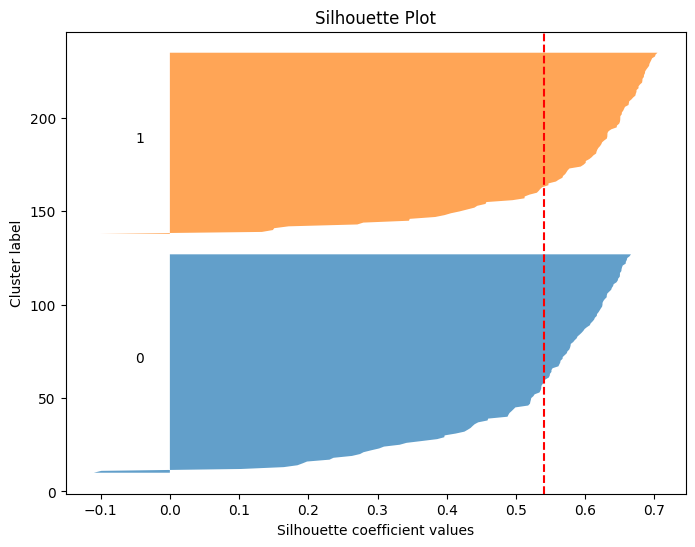

In [ ]:
from sklearn.metrics import silhouette_samples


# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(PCA_data.drop(columns=["ID/Node", 'isNull']), PCA_data["agg_cluster"])

# Create a silhouette plot
plt.figure(figsize=(8, 6))

y_lower = 10
for i in range(num_clusters):
    cluster_silhouette_vals = silhouette_vals[PCA_data["agg_cluster"] == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette Plot")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)

# Applying PCA
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_pca)

# Calculating metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[17  0]
 [ 0 27]]


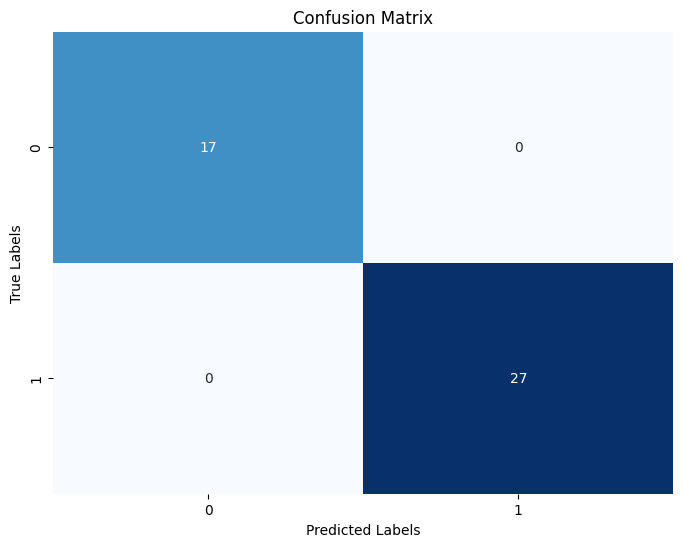

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)

# Applying PCA
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_pca)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


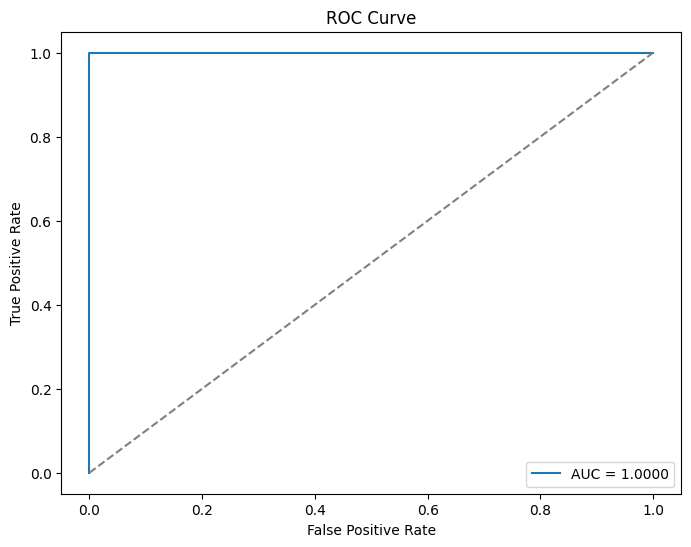

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for the positive class
y_probs = rf_classifier.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()





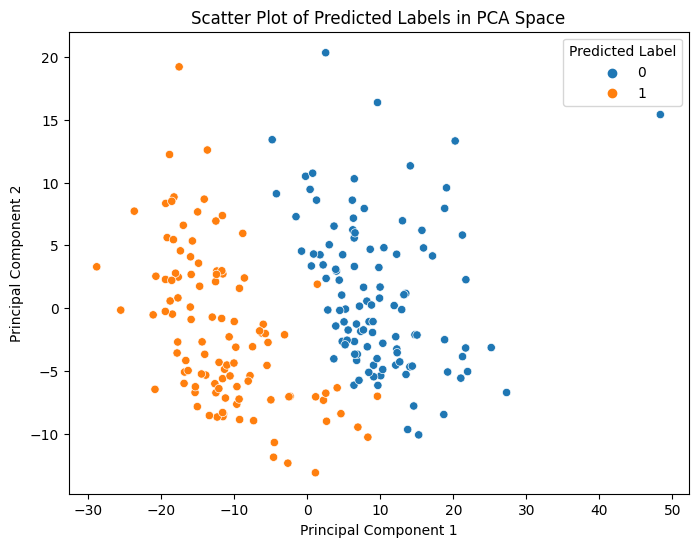

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PCA_data.drop(columns=["ID/Node", "isNull"]), labels, test_size=0.2, random_state=42)

# Applying PCA
n_components = 2  # Reduce to 2 components for visualization
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Predicting labels for the entire dataset
all_data_pca = pca.transform(PCA_data.drop(columns=["ID/Node", "isNull"]))
predicted_labels = rf_classifier.predict(all_data_pca)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=all_data_pca[:, 0], y=all_data_pca[:, 1], hue=predicted_labels)
plt.title('Scatter Plot of Predicted Labels in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Label', loc='upper right')
plt.show()
